Importing dependancies

In [1]:

import torch
from torch import optim
from torch import nn
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets,transforms

In [3]:
torch.manual_seed(7)
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,05.))])
trainset=datasets.MNIST('mnistTrain/',train=True,transform=transform,download=True)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [4]:
torch.manual_seed(7)
testset=datasets.MNIST('mnistTest/',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [9]:
image,label=next(iter(trainloader))
imageTest,labelTest=next(iter(testloader))

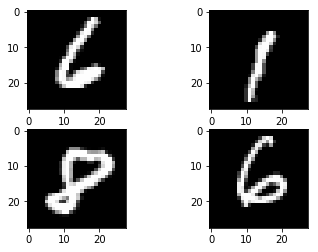

In [10]:
plt.subplot(221)
plt.imshow(image[10].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(image[9].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(image[2].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(image[0].view(28,28), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [11]:
model=nn.Sequential(nn.Linear(784,256),
                   nn.ReLU(),
                   nn.Linear(256,128), 
                   nn.ReLU(),
                   nn.Linear(128,64),
                   nn.ReLU() ,
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1))

### learning rate: 0.004 

In [12]:

criterion=nn.NLLLoss()
epochs=10
optimizer=optim.SGD(model.parameters(),lr=0.004)
errorTrain=[]
errorTest=[]
for e in range(epochs):
    running_loss=0;
    validation_loss=0;
    for images,labels in trainloader:
        optimizer.zero_grad()
        logits=model(images.view(images.shape[0],-1))
        loss=criterion(logits,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss
    else:
        print("Training Loss: {}".format(running_loss/len(trainloader)))
    model.eval()
    for imageTest,labelTest in testloader:
        with torch.no_grad():
            logits_test=model(imageTest.view(imageTest.shape[0],-1))
        lossTest=criterion(logits_test,labelTest)
        validation_loss+=lossTest
    else:
        print("Validation Loss: {}".format(validation_loss/len(testloader)))
        errorTest.append(validation_loss/len(testloader))
        errorTrain.append(running_loss/len(trainloader))
    model.train()    
        
        

Training Loss: 2.1465110778808594
Validation Loss: 1.7441825866699219
Training Loss: 1.0912234783172607
Validation Loss: 0.6638931632041931
Training Loss: 0.5455068945884705
Validation Loss: 0.4608449339866638
Training Loss: 0.4285031259059906
Validation Loss: 0.38493067026138306
Training Loss: 0.3815378248691559
Validation Loss: 0.36038270592689514
Training Loss: 0.3533932566642761
Validation Loss: 0.33468154072761536
Training Loss: 0.3317720592021942
Validation Loss: 0.32008129358291626
Training Loss: 0.3137242794036865
Validation Loss: 0.2959549129009247
Training Loss: 0.2985953390598297
Validation Loss: 0.28848740458488464
Training Loss: 0.2841227948665619
Validation Loss: 0.27279534935951233


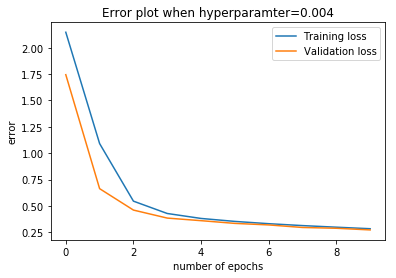

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot([i for i in range(epochs)],errorTrain,label='Training loss')
plt.plot([i for i in range(epochs)],errorTest,label='Validation loss')
plt.legend()
plt.title('Error plot when hyperparamter=0.004')
plt.xlabel('number of epochs')
plt.ylabel('error')
plt.show()
plt.savefig('0.004.png')

###  Learning rate: 0.009

In [14]:
criterion=nn.NLLLoss()
epochs=10
optimizer=optim.SGD(model.parameters(),lr=0.009)
errorTrain=[]
errorTest=[]
for e in range(epochs):
    running_loss=0;
    validation_loss=0;
    for images,labels in trainloader:
        optimizer.zero_grad()
        logits=model(images.view(images.shape[0],-1))
        loss=criterion(logits,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss
    else:
        print("Training Loss: {}".format(running_loss/len(trainloader)))
    model.eval()
    for imageTest,labelTest in testloader:
        with torch.no_grad():
            logits_test=model(imageTest.view(imageTest.shape[0],-1))
        lossTest=criterion(logits_test,labelTest)
        validation_loss+=lossTest
    else:
        print("Validation Loss: {}".format(validation_loss/len(testloader)))
        errorTest.append(validation_loss/len(testloader))
        errorTrain.append(running_loss/len(trainloader))
    model.train()    
        

Training Loss: 0.271019846200943
Validation Loss: 0.252410888671875
Training Loss: 0.24199925363063812
Validation Loss: 0.23544034361839294
Training Loss: 0.21506409347057343
Validation Loss: 0.2012040764093399
Training Loss: 0.1921795904636383
Validation Loss: 0.17764824628829956
Training Loss: 0.17262136936187744
Validation Loss: 0.16853322088718414
Training Loss: 0.15709052979946136
Validation Loss: 0.15340690314769745
Training Loss: 0.1433439552783966
Validation Loss: 0.14467473328113556
Training Loss: 0.13235418498516083
Validation Loss: 0.13837313652038574
Training Loss: 0.1220172792673111
Validation Loss: 0.13572844862937927
Training Loss: 0.11329536885023117
Validation Loss: 0.1200849711894989


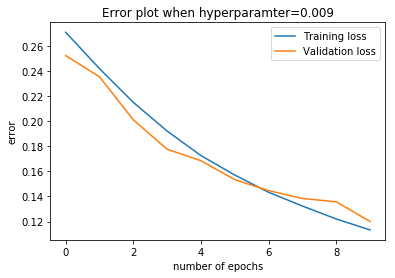

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot([i for i in range(epochs)],errorTrain,label='Training loss')
plt.plot([i for i in range(epochs)],errorTest,label='Validation loss')
plt.legend()
plt.title('Error plot when hyperparamter=0.009')
plt.xlabel('number of epochs')
plt.ylabel('error')
plt.show()
plt.savefig('0.0009.png')

This shows that after 5 epochs the validation accuracy increase, this may be the right point to stop our training.

### Learning rate: 0.01

In [16]:
criterion=nn.NLLLoss()
epochs=10
optimizer=optim.SGD(model.parameters(),lr=0.01)
errorTrain=[]
errorTest=[]
for e in range(epochs):
    running_loss=0;
    validation_loss=0;
    for images,labels in trainloader:
        optimizer.zero_grad()
        logits=model(images.view(images.shape[0],-1))
        loss=criterion(logits,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss
    else:
        print("Training Loss: {}".format(running_loss/len(trainloader)))
    model.eval()
    for imageTest,labelTest in testloader:
        with torch.no_grad():
            logits_test=model(imageTest.view(imageTest.shape[0],-1))
        lossTest=criterion(logits_test,labelTest)
        validation_loss+=lossTest
    else:
        print("Validation Loss: {}".format(validation_loss/len(testloader)))
        errorTest.append(validation_loss/len(testloader))
        errorTrain.append(running_loss/len(trainloader))
    model.train()      
        

Training Loss: 0.10588791221380234
Validation Loss: 0.13183972239494324
Training Loss: 0.09845845401287079
Validation Loss: 0.1081734448671341
Training Loss: 0.0919853001832962
Validation Loss: 0.10517382621765137
Training Loss: 0.08569125831127167
Validation Loss: 0.10343973338603973
Training Loss: 0.0798291265964508
Validation Loss: 0.09921452403068542
Training Loss: 0.07480710744857788
Validation Loss: 0.09477127343416214
Training Loss: 0.07058130949735641
Validation Loss: 0.11532559990882874
Training Loss: 0.0662989616394043
Validation Loss: 0.0934019386768341
Training Loss: 0.06186654791235924
Validation Loss: 0.09485883265733719
Training Loss: 0.05850699543952942
Validation Loss: 0.10751698911190033


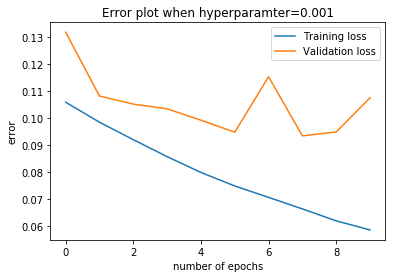

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot([i for i in range(epochs)],errorTrain,label='Training loss')
plt.plot([i for i in range(epochs)],errorTest,label='Validation loss')
plt.legend()
plt.title('Error plot when hyperparamter=0.001')
plt.xlabel('number of epochs')
plt.ylabel('error')
plt.show()
plt.savefig('0.001.png')

Case of high variance (overfitting)